# Ising model simulation with Monte Carlo method

In [1]:
import os
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Circle

In [2]:
fdir = './Documentation/src/images/'
ffmt = 'pdf'
fdpi = 150

axistitlesize = 26
axisticksize = 23
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15
sc = 10

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': False,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

## Characteristic parameters of the system

In [3]:
k_B = 1.380648e-23    # Boltzmann constant
J = 5e-22             # Arbitrary J
T = 200               # Temperature
beta = 1 / (k_B * T)  # Characteristic value

## Random +1 or -1

In [9]:
def get_random_spins(size):
  return np.sign(np.random.random(size) - 0.5)

# Ising model simulation on 2D lattice

In [32]:
# Number of spins in a row at the 2D case
N_spin = 30

start_offset = 2000

In [33]:
# The current positions of the spins
spins = get_random_spins(size=(N_spin, N_spin))

In [81]:
def e_i(spins, s_i,
        J=1, h=0):

  e = 0
  for s_j in spins.flat:
    e += -J/2 * s_i * s_j
  
  return e - h*s_i

In [98]:
def E(spins,
      J=1, h=0, L_cut=2):

  E = 0
  for s_i in spins.flat:
    E += e_i(spins, s_i, J, h)

  return E

In [105]:
def delta_E(spins, i, j,
            J=1, h=0):
  
  dE = 0
  indeces = [[0,1],[0,-1],[1,0],[-1,0]]
  
  for rel in indeces:
    dE += 2 * spins[i,j] * spins[(i + rel[0])%spins.shape[0],
                                 (j + rel[1])%spins.shape[1]]
  
  return dE * J - h*spins[i,j]

In [194]:
def simulation_step(spins,
                    beta=10, J=1, h=0):

  # Choose random index
  r_i = np.random.randint(0, spins.shape[0])
  r_j = np.random.randint(0, spins.shape[1])
  
  # Calculate energy difference
  dE = delta_E(spins, r_i, r_j)
  
  # If dE <= 0, then execute the flip
  if(dE < 0):
    spins[r_i, r_j] *= -1
  elif(dE == 0):
    if(np.random.random() < 0.5):
      spins[r_i, r_j] *= -1
  # If dE > 0, choose a random number X, between 0 and 1
  # If X < e^(-beta * dE), then execute the spin flip
  # If not, then leave the spins' state untouched and continue with the next step
  else:
    if(np.random.random() < np.exp(-beta * dE)):
      spins[r_i, r_j] *= -1

  return spins

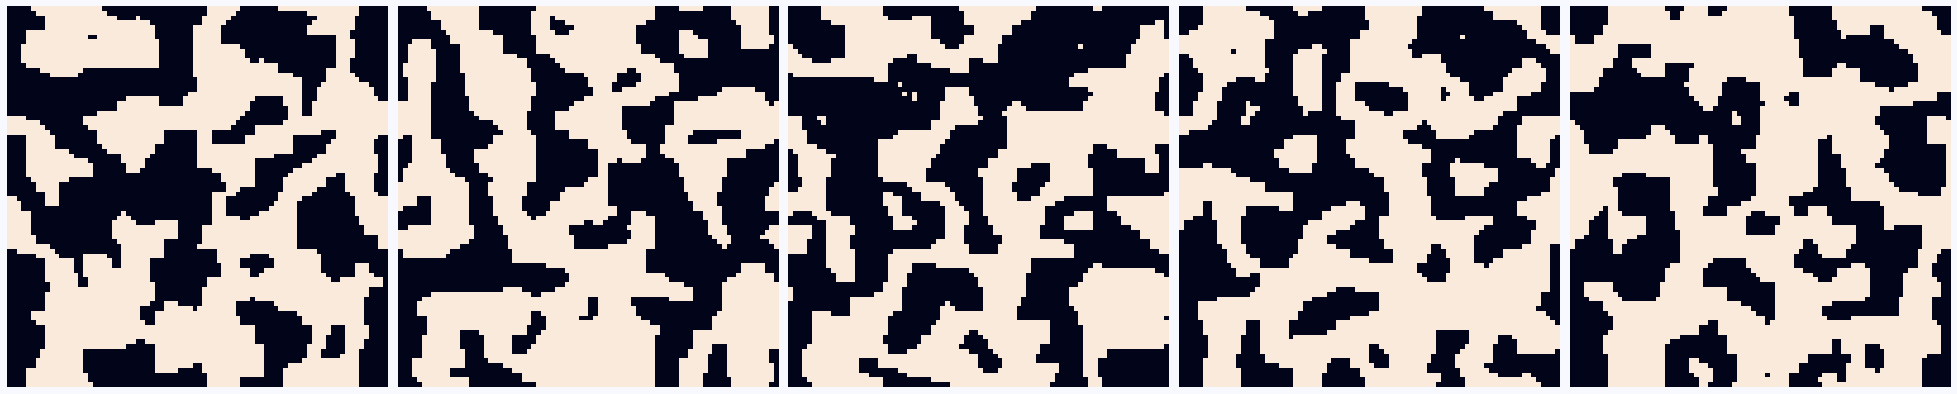

In [202]:
beta = np.logspace(1,10,5)
nrows, ncols = 1, beta.size
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*7, nrows*7),
                         facecolor='ghostwhite')
fig.subplots_adjust(wspace=0.0)

N_steps = 100000
spins = get_random_spins(size=(80,80))

for ax, b in zip(axes.flat, beta):
  ax.axis('off')
  spins_n = spins.copy()
  for _ in range(N_steps):
    spins_n = simulation_step(spins_n,
                              beta=b, J=1, h=h)

  ax.imshow(spins_n, interpolation='none')
    
plt.show()